In [10]:
from sklearn.datasets import load_iris
from metric_learn import LMNN, ITML_Supervised, LSML_Supervised, SDML_Supervised
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [19]:
mls = [
    LMNN(),
    ITML_Supervised(n_constraints=200),
    # SDML_Supervised(n_constraints=200, balance_param=0.001),
    # for some reason SDML throws:
    # RuntimeError: There was a problem in SDML when using scikit-learn's graphical lasso solver.
    # skggm's graphical lasso can sometimes converge on non SPD cases where scikit-learn's graphical lasso fails to converge. 
    # Try to install skggm and rerun the algorithm (see the README.md for the right version of skggm). 
    # The following error message was thrown: 
    # Non SPD result: the system is too ill-conditioned for this solver. The system is too ill-conditioned for this solver.
    LSML_Supervised(n_constraints=200),
]

In [20]:
dataset = load_iris()

In [21]:
iris = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(iris)

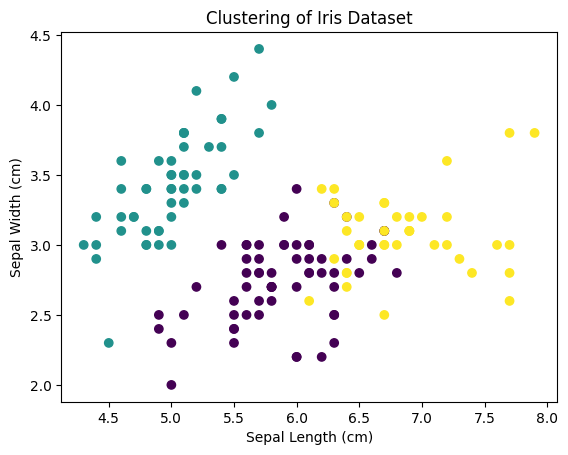

In [23]:
plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=clusters)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clustering of Iris Dataset')
plt.show()

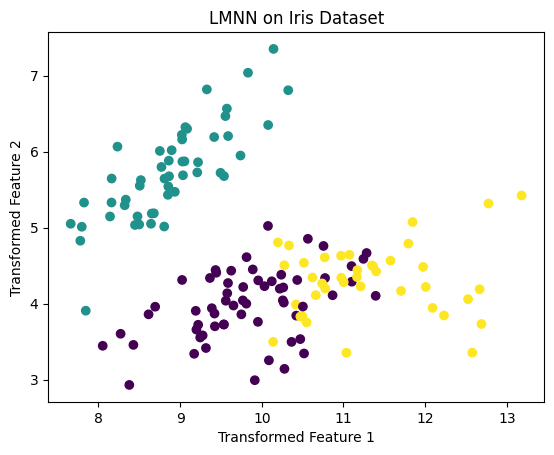

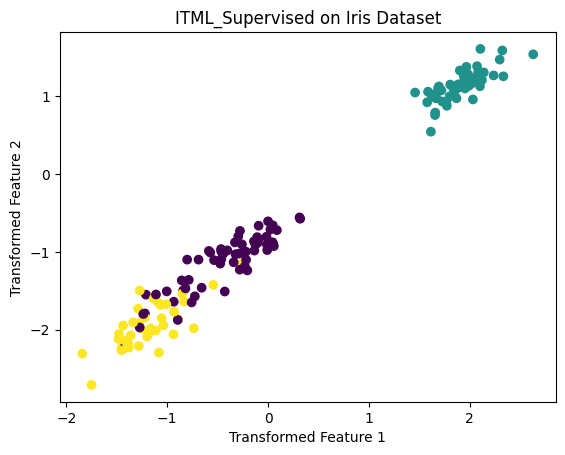

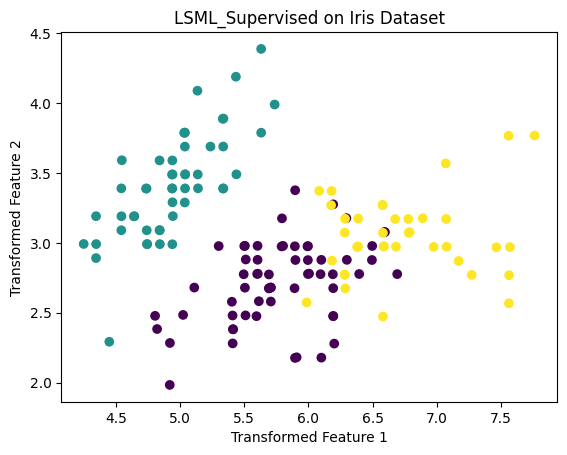

In [24]:
for ml in mls:
    ml.fit(dataset.data, dataset.target)
    iris_transformed = ml.transform(iris.values)
    plt.scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=clusters)
    plt.xlabel('Transformed Feature 1')
    plt.ylabel('Transformed Feature 2')
    plt.title(f'{ml.__class__.__name__} on Iris Dataset')
    plt.show()